In [5]:
!pip install tensorflow matplotlib scikit-learn
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDb dataset with top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure they all have the same length
maxlen = 500  # maximum length of each review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Check shapes
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


(25000, 500) (25000,) (25000, 500) (25000,)


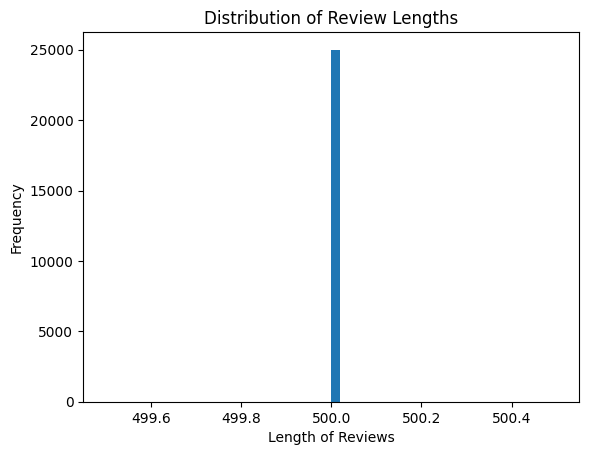

Class distribution: {np.int64(0): np.int64(12500), np.int64(1): np.int64(12500)}


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Reviews")
plt.ylabel("Frequency")
plt.show()

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")


In [8]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_shape=(maxlen,)),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 500, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,543,297 (5.89 MB)

 Trainable params: 1,543,297 (5.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4.1. Deep RNN (Stacked LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))  # Embedding layer
model.add(LSTM(128, return_sequences=True))  # Stacked LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(128))  # Another LSTM layer
model.add(Dropout(0.2))  # Dropout
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


In [ ]:
# 4.2. Bidirectional RNN (Bidirectional LSTM)

from tensorflow.keras.layers import Bidirectional

# Create a Bidirectional RNN model
model_bi = Sequential()
model_bi.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))  # Embedding layer
model_bi.add(Bidirectional(LSTM(128)))  # Bidirectional LSTM layer
model_bi.add(Dropout(0.2))  # Dropout
model_bi.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_bi.summary()


In [9]:
# Train the model (stacked LSTM or Bidirectional LSTM)
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Alternatively, train the bidirectional RNN model
# history_bi = model_bi.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.7301 - loss: 0.5105 - val_accuracy: 0.8527 - val_loss: 0.3537
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.8990 - loss: 0.2615 - val_accuracy: 0.8658 - val_loss: 0.3147
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.9263 - loss: 0.1995 - val_accuracy: 0.8683 - val_loss: 0.3457
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9299 - loss: 0.1832 - val_accuracy: 0.8661 - val_loss: 0.3684
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step - accuracy: 0.9573 - loss: 0.1190 - val_accuracy: 0.8624 - val_loss: 0.4076


In [10]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Alternatively, evaluate the bidirectional RNN model
# loss_bi, accuracy_bi = model_bi.evaluate(x_test, y_test)
# print(f"Test Loss: {loss_bi}")
# print(f"Test Accuracy: {accuracy_bi}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8613 - loss: 0.4149
Test Loss: 0.40761879086494446
Test Accuracy: 0.8623999953269958


In [12]:
from tensorflow.keras.callbacks import LearningRateScheduler

# Example learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 10:
        return 1e-3
    else:
        return 1e-4

lr_callback = LearningRateScheduler(lr_scheduler)

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), callbacks=[lr_callback])


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.9820 - loss: 0.0597 - val_accuracy: 0.8562 - val_loss: 0.4776 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9764 - loss: 0.0683 - val_accuracy: 0.8604 - val_loss: 0.5499 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9791 - loss: 0.0624 - val_accuracy: 0.8532 - val_loss: 0.5135 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9905 - loss: 0.0316 - val_accuracy: 0.8576 - val_loss: 0.6718 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9935 - loss: 0.0217 - val_accuracy: 0.8514 - val_loss: 0.6196 - learning_rate: 0.0010


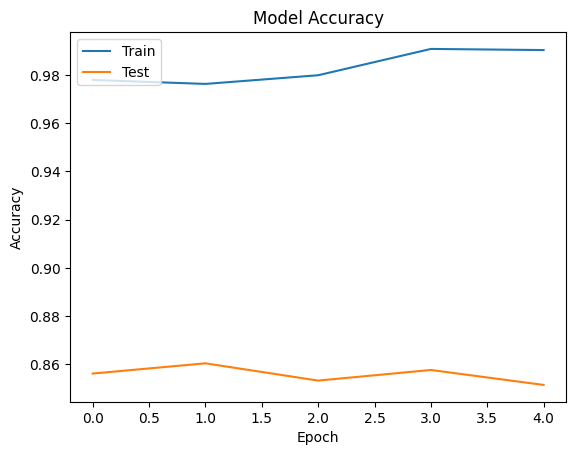

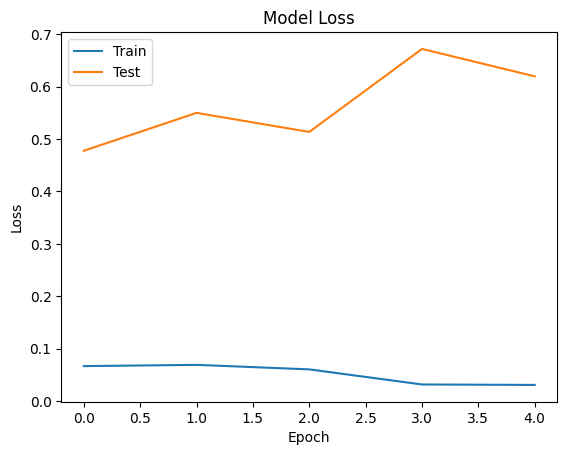

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [18]:
# Make predictions on new, unseen data
sample_review = "The movie was not amazing with great acting and plot twists."
# Get word index mapping for tokenization
word_index = imdb.get_word_index()
# Convert sample review string to a sequence of integers
# Use get() with a default value of 0 (for unknown words)
sample_sequence = [word_index.get(word.lower(), 0) for word in sample_review.split()]
# Pad sequences
sample_padded_sequence = pad_sequences([sample_sequence], maxlen=maxlen)

# Predict sentiment
prediction = model.predict(sample_padded_sequence)
print("Positive" if prediction >= 0.5 else "Negative")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Positive


## Train models

### Subtask:
Train both models using the training data and validate on the test data.

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, LSTM, GRU, Bidirectional

# Define the stacked RNN model
stacked_rnn_model = Sequential([
    Embedding(10000, 32), # Embedding layer to convert words to vectors
    SimpleRNN(5, return_sequences=True),   # RNN layer with 5 units and return sequences
    SimpleRNN(5),                          # Another RNN layer with 5 units
    Dense(1, activation='sigmoid')          # Output layer for binary classification
])

# Compile the stacked RNN model
stacked_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Define the Bidirectional GRU model
bidirectional_rnn_model = Sequential([
    Embedding(10000, 32),
    Bidirectional(GRU(5, return_sequences=True)),
    Bidirectional(GRU(5)),
    Dense(1, activation='sigmoid')
])

# Compile the bidirectional RNN model
bidirectional_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the stacked RNN model
print("Training Stacked RNN Model...")
history_stacked = stacked_rnn_model.fit(x_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

# Train the bidirectional RNN model
print("\nTraining Bidirectional RNN Model...")
history_bidirectional = bidirectional_rnn_model.fit(x_train, y_train, epochs=2, batch_size=32, validation_split=0.2)

Training Stacked RNN Model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.6058 - loss: 0.6389 - val_accuracy: 0.5014 - val_loss: 1.1048
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.7001 - loss: 0.6100 - val_accuracy: 0.8062 - val_loss: 0.4551
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.8455 - loss: 0.3761 - val_accuracy: 0.6644 - val_loss: 0.6189
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 62ms/step - accuracy: 0.7768 - loss: 0.4734 - val_accuracy: 0.7484 - val_loss: 0.5285
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 63ms/step - accuracy: 0.8701 - loss: 0.3258 - val_accuracy: 0.7630 - val_loss: 0.5328

Training Bidirectional RNN Model...
Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 40s 59ms/step - accuracy: 0.6413 - loss: 0.6090 - val_accuracy: 0.8472 - val_loss: 0.3794
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.8770 - loss: 0.3171 - val_accuracy: 0.8664 - val_loss: 0.3269
Epoch 3/5
625/625 ━━━━━━━━━━━━

In [19]:
  # Evaluate the stacked RNN model
print("\nEvaluating Stacked RNN Model...")
loss_stacked, accuracy_stacked = stacked_rnn_model.evaluate(x_test, y_test)


Evaluating Stacked RNN Model...
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.7709 - loss: 0.5201


In [22]:
# Take review input from the user
user_review = input("Please enter a movie review: ")

# Get word index mapping for tokenization (assuming it's already loaded)
# word_index = imdb.get_word_index() # Uncomment this line if word_index is not in the current session

# Convert user review string to a sequence of integers
user_sequence = [word_index.get(word.lower(), 0) for word in user_review.split()]

# Pad sequences
user_padded_sequence = pad_sequences([user_sequence], maxlen=maxlen) # maxlen is assumed to be defined

# Predict sentiment using the bidirectional RNN model
prediction = bidirectional_rnn_model.predict(user_padded_sequence)

# Print the prediction
print("Positive" if prediction >= 0.5 else "Negative")

Please enter a movie review: "The movie was not bad with great acting and plot twists."
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Positive


To build a **real-world project** with the IMDb dataset using RNNs (Deep RNNs or Bidirectional RNNs), it's important to follow a more structured and practical approach, not only focusing on the model itself but also addressing other aspects of the project like deployment, evaluation, and improving model performance. Here’s a complete roadmap for building a real-world sentiment analysis project using RNNs, using the **IMDb Movie Reviews** dataset.

### **Project Breakdown: Sentiment Analysis on IMDb Reviews**

#### **1. Problem Definition**

The problem is to predict whether a movie review (from IMDb) is **positive** or **negative**. This is a binary classification problem where the goal is to predict the sentiment of a given review based on its content.

#### **2. Requirements & Setup**

Before jumping into coding, let's list the **tools** and **libraries** you’ll need:

* Python 3.x
* TensorFlow/Keras for deep learning
* Matplotlib/Seaborn for visualizations
* Scikit-learn for additional utilities (e.g., metrics, cross-validation)
* Jupyter Notebook (optional) for interactive development

You can install the required libraries using:

```bash
pip install tensorflow matplotlib scikit-learn
```

#### **3. Data Collection and Preprocessing**

You’ll use the **IMDb dataset** from TensorFlow/Keras.

1. **Loading the Data:**

```python
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load IMDb dataset with top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to ensure they all have the same length
maxlen = 500  # maximum length of each review
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Check shapes
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
```

2. **Data Exploration (Optional):**

It’s good to visualize some basic statistics about the data, such as the length of reviews, class distribution, etc.

```python
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.hist(review_lengths, bins=50)
plt.title("Distribution of Review Lengths")
plt.xlabel("Length of Reviews")
plt.ylabel("Frequency")
plt.show()

# Class distribution
unique, counts = np.unique(y_train, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")
```

#### **4. Building the Model**

Now, let's create and train an RNN model. Since we are targeting a real-world project, I’ll provide examples for **stacked LSTM** and **Bidirectional LSTM**.

**4.1. Deep RNN (Stacked LSTM)**

```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))  # Embedding layer
model.add(LSTM(128, return_sequences=True))  # Stacked LSTM layer
model.add(Dropout(0.2))  # Dropout for regularization
model.add(LSTM(128))  # Another LSTM layer
model.add(Dropout(0.2))  # Dropout
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()
```

**4.2. Bidirectional RNN (Bidirectional LSTM)**

```python
from tensorflow.keras.layers import Bidirectional

# Create a Bidirectional RNN model
model_bi = Sequential()
model_bi.add(Embedding(input_dim=10000, output_dim=128, input_length=maxlen))  # Embedding layer
model_bi.add(Bidirectional(LSTM(128)))  # Bidirectional LSTM layer
model_bi.add(Dropout(0.2))  # Dropout
model_bi.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model_bi.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model_bi.summary()
```

#### **5. Training the Model**

Since this is a real-world project, you should aim to train the model for several epochs and monitor the performance. You can use a **validation split** or **validation data** for better insights during training.

```python
# Train the model (stacked LSTM or Bidirectional LSTM)
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Alternatively, train the bidirectional RNN model
# history_bi = model_bi.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))
```

#### **6. Model Evaluation**

Once the model is trained, evaluate it on the test data. You can also generate accuracy and loss plots for a clearer understanding of performance.

```python
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Alternatively, evaluate the bidirectional RNN model
# loss_bi, accuracy_bi = model_bi.evaluate(x_test, y_test)
# print(f"Test Loss: {loss_bi}")
# print(f"Test Accuracy: {accuracy_bi}")
```

#### **7. Model Tuning**

To further improve the model, you can tune various hyperparameters:

* **Number of LSTM units**: Increasing/decreasing units per LSTM layer.
* **Dropout rate**: Helps with regularization to prevent overfitting.
* **Learning rate**: Adjust learning rates using callbacks.
* **Batch size and Epochs**: Tune these based on GPU capacity and overfitting.

**Example: Learning Rate Scheduling**

```python
from tensorflow.keras.callbacks import LearningRateScheduler

# Example learning rate scheduler
def lr_scheduler(epoch):
    if epoch < 10:
        return 1e-3
    else:
        return 1e-4

lr_callback = LearningRateScheduler(lr_scheduler)

history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test), callbacks=[lr_callback])
```

#### **8. Visualization: Training & Validation Metrics**

Visualize the training and validation accuracy/loss over epochs to see if the model is overfitting or underfitting.

```python
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
```

#### **9. Model Deployment: Predicting New Reviews**

After training and tuning your model, it’s time to deploy it for **real-time prediction**.

```python
# Make predictions on new, unseen data
sample_review = "The movie was amazing with great acting and plot twists."
sample_review = imdb.get_word_index()  # Get word index mapping for tokenization
sample_review = pad_sequences([sample_review], maxlen=maxlen)

# Predict sentiment
prediction = model.predict(sample_review)
print("Positive" if prediction >= 0.5 else "Negative")
```

#### **10. Deployment & Next Steps**

In a real-world scenario, you’ll want to deploy your model. Here are some common deployment strategies:

1. **Web Application**: Create a Flask/Django app where users can input reviews and get sentiment predictions in real-time.
2. **Cloud Deployment**: Deploy the model on AWS, Google Cloud, or Azure using **TensorFlow Serving** or **Flask** to serve the model via an API.

**Example Flask API**:

```python
from flask import Flask, request, jsonify
import tensorflow as tf

app = Flask(__name__)

# Load the model
model = tf.keras.models.load_model('path_to_model.h5')

@app.route('/predict', methods=['POST'])
def predict():
    review = request.json['review']
    # Tokenize and pad the review
    # prediction logic
    return jsonify({"sentiment": "positive"})

if __name__ == '__main__':
    app.run(debug=True)
```

### **Summary of the Real-World Project Workflow**

1. **Data Preparation**: Load, preprocess, and explore the IMDb dataset.
2. **Model Development**: Create deep RNN or Bidirectional RNN using LSTM layers.
3. **Model Evaluation**: Train the model, evaluate it, and fine-tune hyperparameters.
4. **Deployment**: Build a simple web API using Flask to serve the model for real-time predictions.

This approach not only involves building a robust RNN model but also encapsulates the real-world process of deploying it and testing it in production.

Feel free to reach out if you want help with any of the steps or need further details!
